In [42]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
path = 'BBDD_evaluacion.xlsx' #cambiar aca por la ruta del archivo
df_og = pd.read_excel(path)
df_og

,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index
0,Buenos Aires,2.926899e+08,NaN,8.167798,5.511856,0.766168,NaN,4.4,15625084.0,0.000006,0.004836,3.551157e+06,Middle
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,NaN,1.5,367828.0,0.000005,0.004502,2.452248e+05,High
2,Córdoba,6.936374e+07,NaN,5.382380,10.436086,1.035056,45.7640,NaN,NaN,0.000011,0.010175,6.893503e+05,Low
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595.0,0.000004,0.004495,1.682386e+05,High
4,Chaco,9.832643e+06,7.517580,15.862619,NaN,2.577462,65.5104,7.5,1055259.0,0.000003,0.003605,1.407033e+05,High
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108.0,0.000016,0.004498,1.697054e+05,Middle
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994.0,0.000006,0.004679,3.987101e+05,Low
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,NaN,530162.0,0.000004,0.003440,3.272710e+04,High
8,Jujuy,6.484938e+06,2.151390,NaN,12.483179,0.721295,54.1615,3.7,673307.0,0.000003,0.003958,1.819785e+05,High
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951.0,0.000019,0.005415,4.429922e+04,Low


In [18]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PROVINCIA               22 non-null     object 
 1   gdp                     22 non-null     float64
 2   illiteracy              20 non-null     float64
 3   poverty                 20 non-null     float64
 4   deficient_infra         20 non-null     float64
 5   school_dropout          22 non-null     float64
 6   no_healthcare           20 non-null     float64
 7   birth_mortal            20 non-null     float64
 8   pop                     21 non-null     float64
 9   movie_theatres_per_cap  22 non-null     float64
 10  doctors_per_cap         22 non-null     float64
 11  Score                   22 non-null     float64
 12  poverty_index           22 non-null     object 
dtypes: float64(11), object(2)
memory usage: 2.4+ KB


In [14]:
# Dimensiones del DataFrame
df_og.shape

(22, 13)

In [15]:
# Datos nulos por columna
df_og.isna().sum().sort_values()

PROVINCIA                 0
gdp                       0
school_dropout            0
movie_theatres_per_cap    0
poverty_index             0
Score                     0
doctors_per_cap           0
pop                       1
birth_mortal              2
no_healthcare             2
deficient_infra           2
poverty                   2
illiteracy                2
dtype: int64

In [16]:
# Suma de casos duplicados
df_og.duplicated().sum()

np.int64(0)

In [17]:
df_og["pop"].describe()

count    2.100000e+01
mean     1.609089e+06
std      3.278378e+06
min      2.739640e+05
25%      5.091080e+05
50%      6.810550e+05
75%      1.214441e+06
max      1.562508e+07
Name: pop, dtype: float64

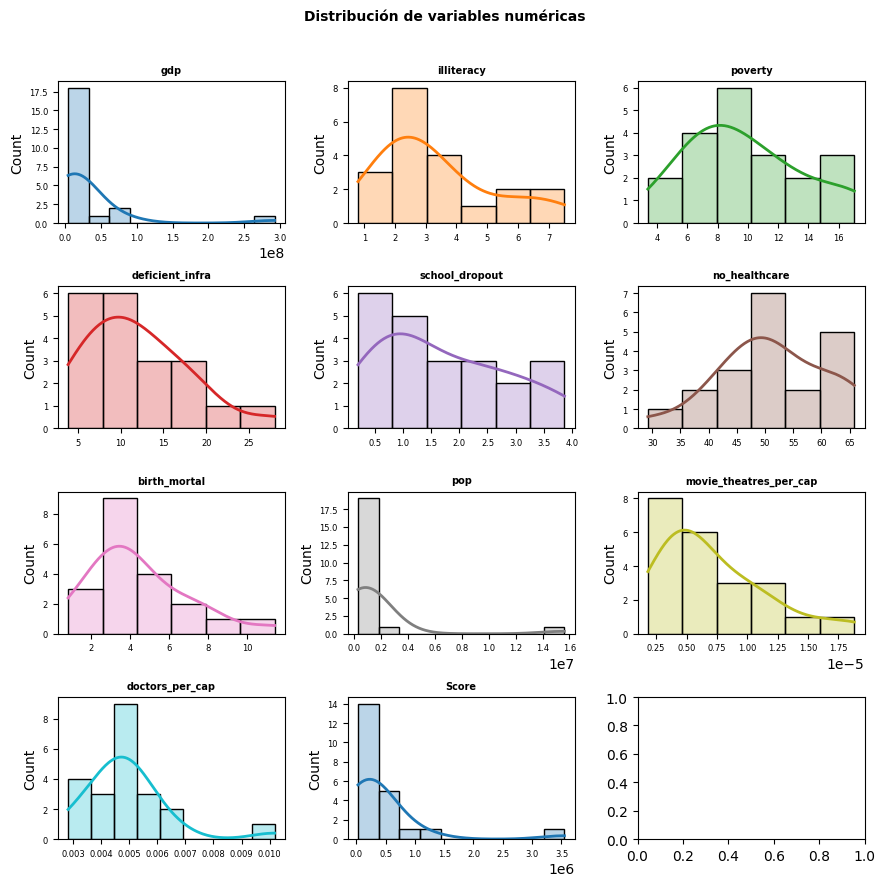

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 9))
axes = axes.flat
columnas_numeric = df_og.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df_og,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables numéricas', fontsize = 10, fontweight = "bold");

In [26]:
# La Variable POP tiene todo menos una distibucion nomal, por lo tanto le imputaremos la mediana
df_mod= df_og.copy()
df_mod["pop"].fillna(df_mod["pop"].median(), inplace=True)
df_mod

C:\Users\diren\AppData\Local\Temp\ipykernel_22412\1419430722.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mod["pop"].fillna(df_mod["pop"].median(), inplace=True)


,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index
0,Buenos Aires,2.926899e+08,NaN,8.167798,5.511856,0.766168,NaN,4.4,15625084.0,0.000006,0.004836,3.551157e+06,Middle
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,NaN,1.5,367828.0,0.000005,0.004502,2.452248e+05,High
2,Córdoba,6.936374e+07,NaN,5.382380,10.436086,1.035056,45.7640,NaN,681055.0,0.000011,0.010175,6.893503e+05,Low
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595.0,0.000004,0.004495,1.682386e+05,High
4,Chaco,9.832643e+06,7.517580,15.862619,NaN,2.577462,65.5104,7.5,1055259.0,0.000003,0.003605,1.407033e+05,High
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108.0,0.000016,0.004498,1.697054e+05,Middle
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994.0,0.000006,0.004679,3.987101e+05,Low
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,NaN,530162.0,0.000004,0.003440,3.272710e+04,High
8,Jujuy,6.484938e+06,2.151390,NaN,12.483179,0.721295,54.1615,3.7,673307.0,0.000003,0.003958,1.819785e+05,High
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951.0,0.000019,0.005415,4.429922e+04,Low


In [27]:
df_og["pop"].describe(), df_mod["pop"].describe()

(count    2.100000e+01
 mean     1.609089e+06
 std      3.278378e+06
 min      2.739640e+05
 25%      5.091080e+05
 50%      6.810550e+05
 75%      1.214441e+06
 max      1.562508e+07
 Name: pop, dtype: float64,
 count    2.200000e+01
 mean     1.566905e+06
 std      3.205481e+06
 min      2.739640e+05
 25%      5.143715e+05
 50%      6.810550e+05
 75%      1.186229e+06
 max      1.562508e+07
 Name: pop, dtype: float64)

In [28]:
min=df_mod['pop'].min()
Q1=df_mod['pop'].quantile(0.25) # 25%
Q2=df_mod['pop'].quantile(0.50) # 50%
Q3=df_mod['pop'].quantile(0.75) # 75%
IQR=Q3-Q1 # Threshold #
max=df_mod['pop'].max()
mu=df_mod['pop'].mean()
sd=df_mod['pop'].std()

Value=[min,Q1,Q2,Q3,IQR,max, mu,sd]
Col=["min","25%","50%","75%","IQR","max","mean", "st_dev"]
Estadistics=pd.DataFrame(Value,Col)
Estadistics

,0
min,2.739640e+05
25%,5.143715e+05
50%,6.810550e+05
75%,1.186229e+06
IQR,6.718575e+05
max,1.562508e+07
mean,1.566905e+06
st_dev,3.205481e+06


In [ ]:
df_mod["nivel_pop"]=""
df_mod.loc[df_mod["pop"]<=Q1,"nivel_pop"]="C" # si es menor o igual al primer cuartil es tipo "C"
df_mod.loc[(df_mod["pop"]>Q1) & (df_mod["pop"]<=Q3),"nivel_pop"]="B" # si es mayor al primer cuartil y menor o igual al tercer cuartil es tipo "B"
df_mod.loc[df_mod["pop"]>Q3,"nivel_pop"]="A" # si es mayor al tercer cuartil es tipo "A"
df_mod["nivel_pop"].value_counts()
df_mod

,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,nivel_pop
0,Buenos Aires,2.926899e+08,NaN,8.167798,5.511856,0.766168,NaN,4.4,15625084.0,0.000006,0.004836,3.551157e+06,Middle,A
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,NaN,1.5,367828.0,0.000005,0.004502,2.452248e+05,High,C
2,Córdoba,6.936374e+07,NaN,5.382380,10.436086,1.035056,45.7640,NaN,681055.0,0.000011,0.010175,6.893503e+05,Low,B
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595.0,0.000004,0.004495,1.682386e+05,High,B
4,Chaco,9.832643e+06,7.517580,15.862619,NaN,2.577462,65.5104,7.5,1055259.0,0.000003,0.003605,1.407033e+05,High,B
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108.0,0.000016,0.004498,1.697054e+05,Middle,C
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994.0,0.000006,0.004679,3.987101e+05,Low,A
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,NaN,530162.0,0.000004,0.003440,3.272710e+04,High,B
8,Jujuy,6.484938e+06,2.151390,NaN,12.483179,0.721295,54.1615,3.7,673307.0,0.000003,0.003958,1.819785e+05,High,B
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951.0,0.000019,0.005415,4.429922e+04,Low,C


In [43]:
scaler = RobustScaler()
df_mod["N_pop"] = scaler.fit_transform(df_mod[["pop"]])

df_mod[["pop", "N_pop"]]

,pop,N_pop
0,15625084.0,22.242855
1,367828.0,-0.466210
2,681055.0,0.000000
3,992595.0,0.463700
4,1055259.0,0.556969
5,509108.0,-0.255928
6,1235994.0,0.825977
7,530162.0,-0.224591
8,673307.0,-0.011532
9,318951.0,-0.538960


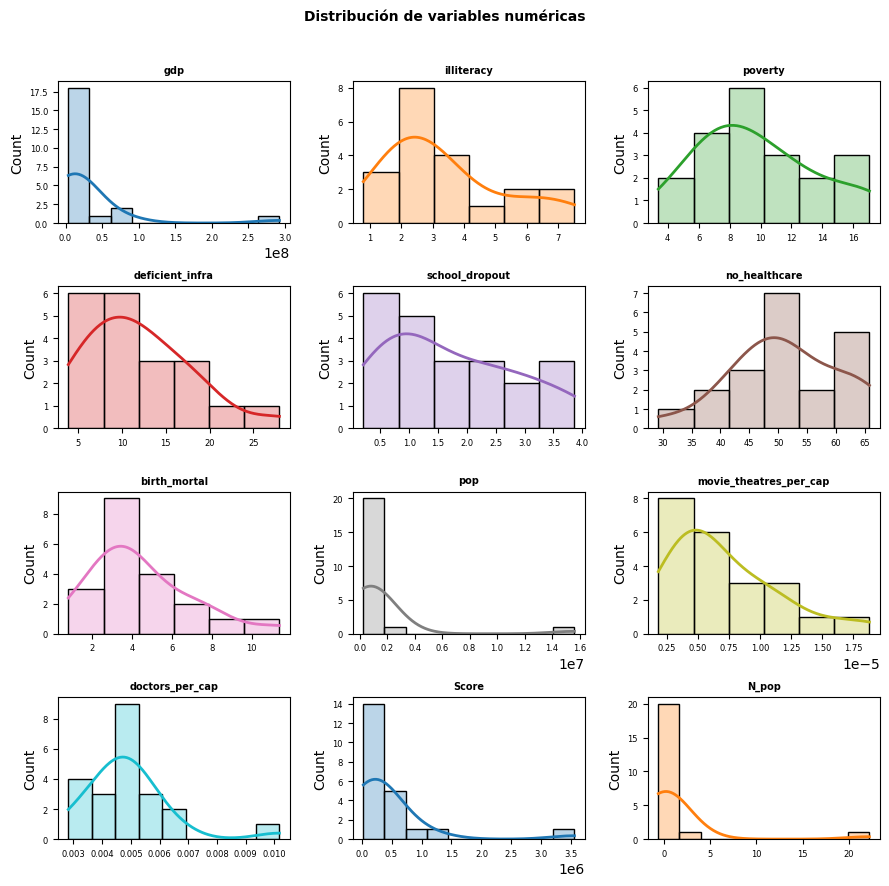

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 9))
axes = axes.flat
columnas_numeric = df_mod.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df_mod,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables numéricas', fontsize = 10, fontweight = "bold");

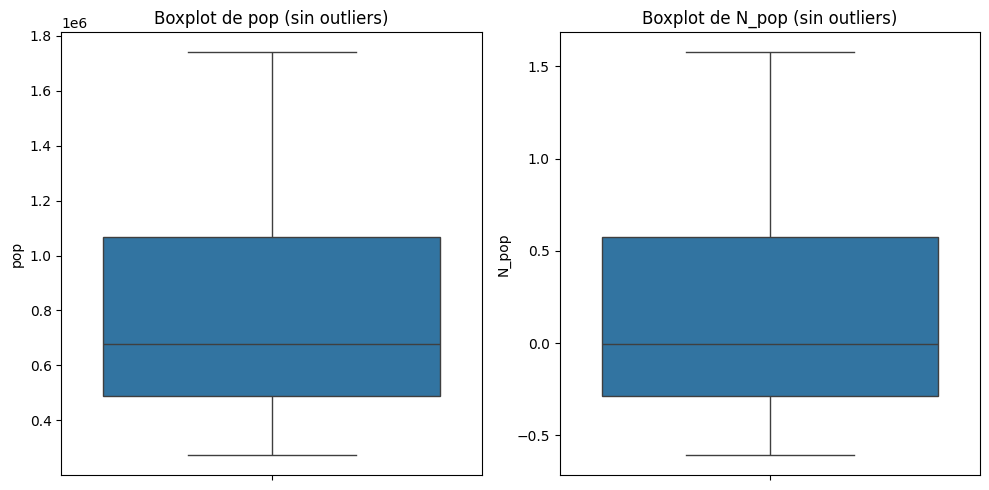

In [47]:
# Boxplot para comparar pop y N_pop excluyendo outliers usando índices

q1 = df_mod["pop"].quantile(0.25)
q3 = df_mod["pop"].quantile(0.75)
iqr = q3 - q1
sup = q3 + iqr * 1.5
inf = q1 - iqr * 1.5

# Encontrar índices de outliers
outliers_indices = np.where((df_mod["pop"] > sup) | (df_mod["pop"] < inf))[0]

# Excluir outliers
df_no_outliers = df_mod.drop(index=outliers_indices)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(y=df_no_outliers["pop"], ax=axes[0])
axes[0].set_title("Boxplot de pop (sin outliers)")

sns.boxplot(y=df_no_outliers["N_pop"], ax=axes[1])
axes[1].set_title("Boxplot de N_pop (sin outliers)")

plt.tight_layout()
plt.show()